# Bank Marketing Classification
*By Jiayin Ma*
<br>*February 2018*

____________________________________________________________________________________________________

## Content

### 1. Objectives

### 2. Exploratory Data Analysis
* Import Libraries
* Data Overview
* Clean Data
* Get Dummies
* Visualisations and Statistical Summaries

### 3. Modeling
* Build the Model
* Find the most important features

### 4. Summary

_______________________________________________________________________________________________________

# 1. Objectives

To predict if the client will subscribe (yes/no) a term deposit.

# 2. Exploratory Data Analysis

### Import Libraries

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import CountVectorizer

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8, 6

/Users/carlicema/Documents/My_Studio/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Data Overview

In [4]:
df = pd.read_csv('bank-additional/bank-additional-full.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

<font color=blue>No missing value in the dataset.

**How many people subcribed the term deposit?**

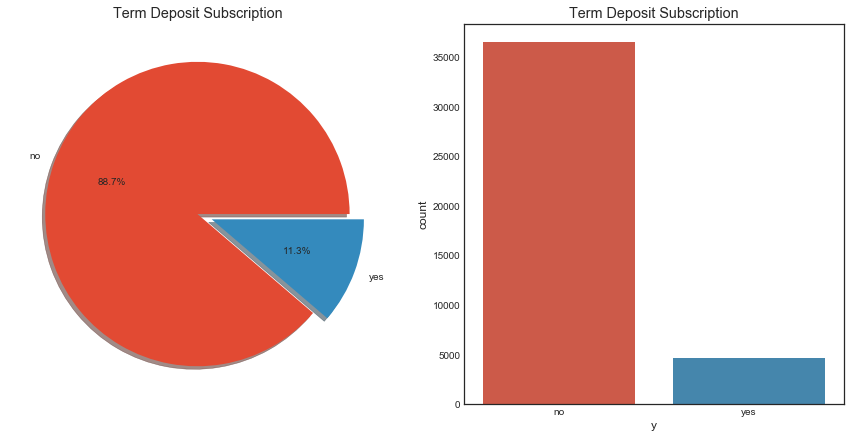

no     36548
yes     4640
Name: y, dtype: int64


In [6]:
f,ax=plt.subplots(1,2,figsize=(15,7))
df['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Term Deposit Subscription')
ax[0].set_ylabel('')
sns.countplot('y',data=df,ax=ax[1])
ax[1].set_title('Term Deposit Subscription')
plt.show()

print (df['y'].value_counts())

<font color=blue>There are not many clients subscribe the term deposit.
<br>Out of 41188 clients, only 4640 clients (11.3%) subscribed the product.

**What are the features?**
<br>There are 3 categories of data: client information, client relations, company and economic context.

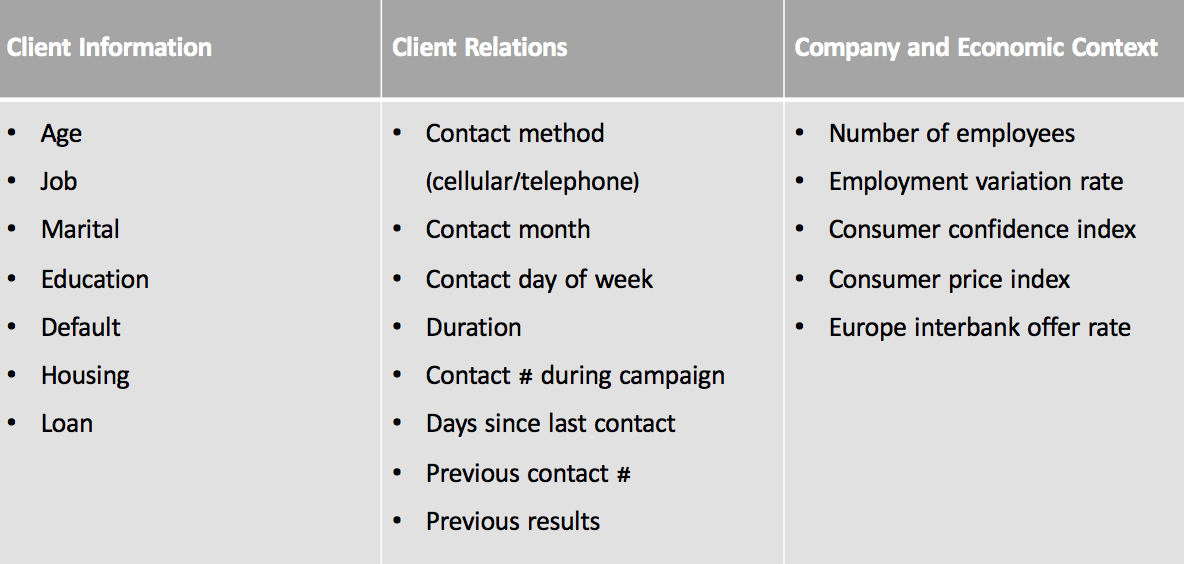

**Prepare the categorical data for data analysis**

In [55]:
# check "unknown" value for the categorical features

print (df['job'].value_counts())
print ('-----------------------------')
print (df['marital'].value_counts())
print ('-----------------------------')
print (df['education'].value_counts())
print ('-----------------------------')
print (df['default'].value_counts())
print ('-----------------------------')
print (df['housing'].value_counts())
print ('-----------------------------')
print (df['loan'].value_counts())
print ('-----------------------------')
print (df['contact'].value_counts())
print ('-----------------------------')
print (df['month'].value_counts())
print ('-----------------------------')
print (df['day_of_week'].value_counts())
print ('-----------------------------')
print (df['poutcome'].value_counts())
print ('-----------------------------')
print (df['y'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-----------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-----------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-----------------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-----------------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
-----------------------------
no         33950
yes         6

**Get Dummies**

In [7]:
# convert the categorical variables into dummy variables

# job
df_job_dum = pd.get_dummies(df['job'])
df_job_dum.columns = ['admin', 'blue_collar', 'enterpreneur', 'housemaid', 'management', 'retired', 'self_employed', 
                      'services', 'student', 'technician', 'unemployed', 'unknown']

# marital
df_marital_dum = pd.get_dummies(df['marital'])
df_marital_dum.columns = ['divorced', 'married', 'single', 'unk_marital']

# education
df['edu_copy'] = df['education']
df['edu_copy'].loc[df['edu_copy']=='illiterate'] = 'primary' # 1: primary and below primary education
df['edu_copy'].loc[df['edu_copy']=='basic.4y'] = 'primary'  
df['edu_copy'].loc[df['edu_copy']=='basic.6y'] = 'primary'
df['edu_copy'].loc[df['edu_copy']=='basic.9y'] = 'secondary'  # 2: secondary education
df['edu_copy'].loc[df['edu_copy']=='high.school'] = 'secondary'
df['edu_copy'].loc[df['edu_copy']=='professional.course'] = 'tertiary'  # 3: tertiary education
df['edu_copy'].loc[df['edu_copy']=='university.degree'] = 'tertiary'
df['edu_copy'].loc[df['edu_copy']=='unknown'] = 'unknown'   # 4: unknown
df_edu_dum = pd.get_dummies(df['edu_copy'])
df_edu_dum.columns = ['primary_edu', 'secondary_edu', 'tertiary_edu', 'unk_edu']

# default
df_default_dum = pd.get_dummies(df['default'])
df_default_dum.columns = ['no_default', 'unk_default', 'yes_default']

# housing
df_housing_dum = pd.get_dummies(df['housing'])
df_housing_dum.columns = ['no_housing', 'unk_housing', 'yes_housing']

# loan
df_loan_dum = pd.get_dummies(df['loan'])
df_loan_dum.columns = ['no_loan', 'unk_loan', 'yes_loan']

# contact
df['contact_dum'] = df['contact']
df['contact_dum'].loc[df['contact_dum']=="cellular"] = 1
df['contact_dum'].loc[df['contact_dum']=="telephone"] = 0


# month
df_month_dum = pd.get_dummies(df['month'])

# day of week
df_week_dum = pd.get_dummies(df['day_of_week'])

# y
df['y_copy'] = df['y']
df['y_copy'].loc[df['y_copy']=="yes"] = 1
df['y_copy'].loc[df['y_copy']=="no"] = 0


df_join = df.join(df_job_dum)
df_join = df_join.join(df_marital_dum)
df_join = df_join.join(df_edu_dum)
df_join = df_join.join(df_default_dum)
df_join = df_join.join(df_housing_dum)
df_join = df_join.join(df_loan_dum)
df_join = df_join.join(df_month_dum)
df_join = df_join.join(df_week_dum)
df_join.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0


In [26]:
df_cate = df_join[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_dum', 'month', 'day_of_week', 'poutcome', 'edu_copy']]

,job,marital,education,default,housing,loan,contact_dum,month,day_of_week,poutcome,edu_copy
0,housemaid,married,basic.4y,no,no,no,0,may,mon,nonexistent,primary
1,services,married,high.school,unknown,no,no,0,may,mon,nonexistent,secondary
2,services,married,high.school,no,yes,no,0,may,mon,nonexistent,secondary
3,admin.,married,basic.6y,no,no,no,0,may,mon,nonexistent,primary
4,services,married,high.school,no,no,yes,0,may,mon,nonexistent,secondary


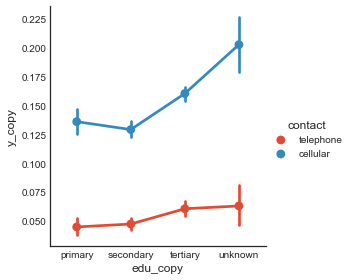

In [17]:
sns.factorplot('edu_copy','y_copy',hue='contact',data=df_join)
plt.show()

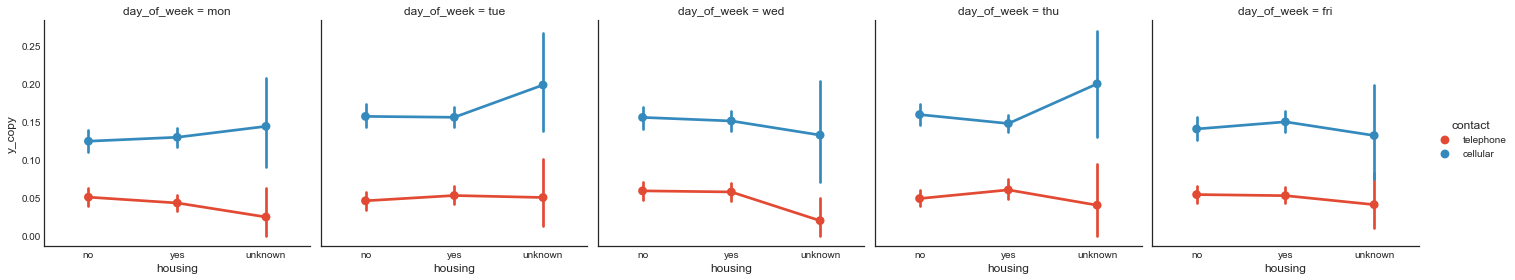

In [73]:
sns.factorplot('housing','y_copy',hue='contact',col='day_of_week',data=df_join)
plt.show()

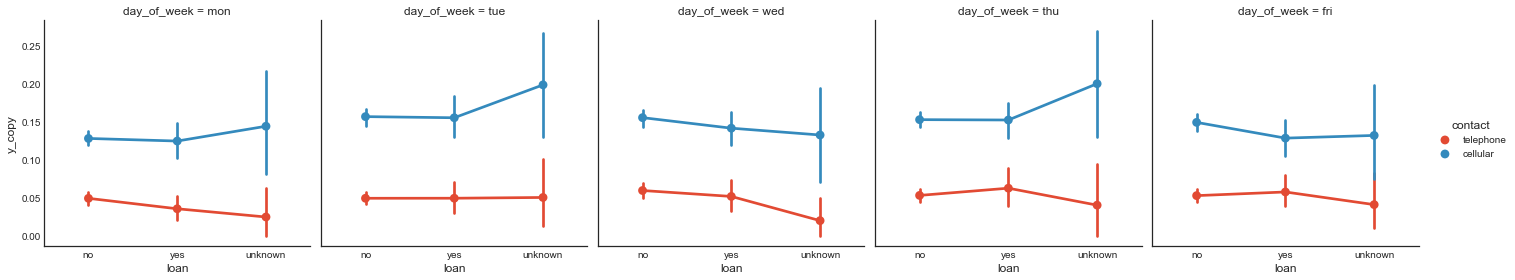

In [74]:
sns.factorplot('loan','y_copy',hue='contact',col='day_of_week',data=df_join)
plt.show()

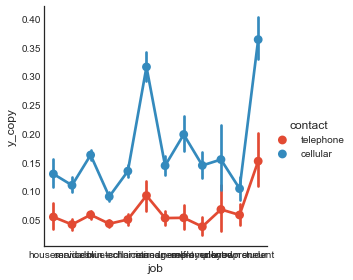

In [77]:
sns.factorplot('job','y_copy',hue='contact',data=df_join)
plt.show()

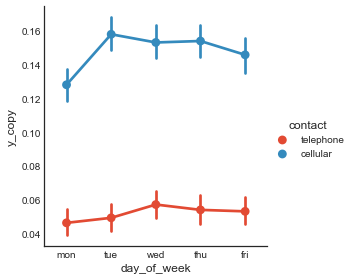

In [97]:
sns.factorplot('day_of_week','y_copy',hue='contact',data=df_join)
plt.show()

# 4. Modeling

### Prepare train dataset and test dataset

In [8]:
# Drop the columns that will not be used in data analysis to simplify the dataset.

# Dropping "duration" is because the call duration is not known until the the call finished. 
# However, after the end of the call the result (y) is obviously known.
# Therefore, duration cannot used as a predicted feature.

df_new = df_join.drop(['poutcome', 'duration', 'euribor3m', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'job', 'marital', 'default', 'education', 'edu_copy', 'housing',
                      'loan', 'contact', 'month', 'day_of_week', 'y'], axis=1)
df_new.head(5)

,age,campaign,pdays,previous,nr.employed,contact_dum,y_copy,admin,blue_collar,enterpreneur,...,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
0,56,1,999,0,5191.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,57,1,999,0,5191.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,37,1,999,0,5191.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,40,1,999,0,5191.0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,56,1,999,0,5191.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
X = df_new.drop('y_copy', axis=1)
y = df_new['y_copy']
print (X.shape)
print (y.shape)

(41188, 50)
(41188,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(28831, 50)
(12357, 50)
(28831,)
(12357,)


In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Models

#### Decision Tree

In [51]:
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred_tree = DecTree.predict(X_test)
sc1 = metrics.accuracy_score(y_pred_tree,y_test)
print ('accuracy score:', sc1)

accuracy score: 0.8377437889455369


#### Random Forest

In [52]:
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred_ran = RandFor.predict(X_test)
sc2 = metrics.accuracy_score(y_pred_ran,y_test)
print ('accuracy score:', sc2)

accuracy score: 0.8892935178441369


#### Gradient Boost Classifier

In [53]:
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred_gbm = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred_gbm,y_test)
print ('accuracy score:', sc3)

accuracy score: 0.9000566480537348


#### Logistic Regression

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)
print ('accuracy score:', sc4)

accuracy score: 0.8980335032774945


#### SVC

In [55]:
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)
print ('accuracy score:', sc5)

accuracy score: 0.8986809096058914


In [17]:
pd.DataFrame([['Decision Tree',sc1],['Random Forest',sc2], ['Gradient Boost',sc3], ['Logistic Regression',sc4], 
              ['Support Vector Machine',sc5]],  columns=['Model','Accuracy'])

,Model,Accuracy
0,Decision Tree,0.836368
1,Random Forest,0.889294
2,Gradient Boost,0.900057
3,Logistic Regression,0.898034
4,Support Vector Machine,0.898681


### Feature Selection Using the Best Model

In [18]:
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
rfecv_gbm = RFECV(estimator=gbmMod, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv_gbm.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv_gbm.n_features_)

Optimal number of features : 16


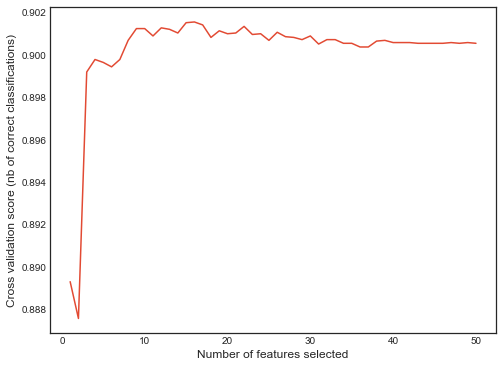

In [19]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_gbm.grid_scores_) + 1), rfecv_gbm.grid_scores_)
plt.show()

MSE: 0.0777


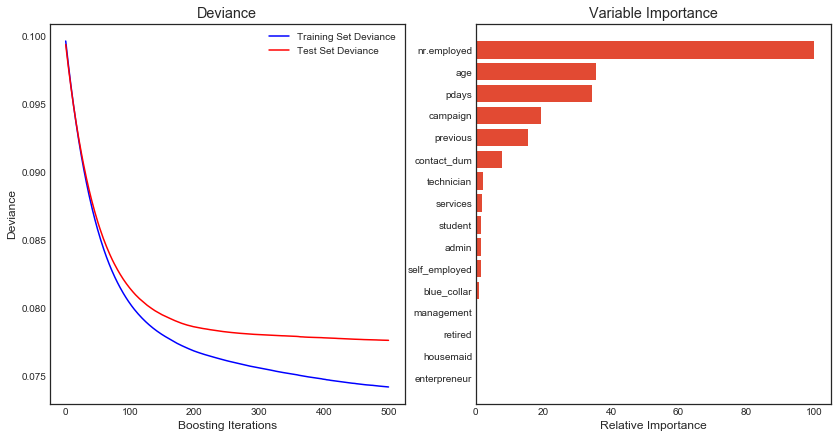

In [20]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)
    

# Plot training deviance
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


# Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance[0:16])
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [21]:
# pick the top 16 important features as train data and test data

X_train_topfea = X_train[['nr.employed', 'age', 'pdays', 'campaign', 'previous', 'contact_dum', 'technician', 
                          'services', 'admin', 'student', 'self_employed', 'blue_collar', 'management', 'retired', 'housemaid', 
                          'enterpreneur']]
X_test_topfea = X_test[['nr.employed', 'age', 'pdays', 'campaign', 'previous', 'contact_dum', 'technician', 
                          'services', 'admin', 'student', 'self_employed', 'blue_collar', 'management', 'retired', 'housemaid', 
                          'enterpreneur']]

# modeling
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train_topfea,y_train)
y_pred = gbmMod.predict(X_test_topfea)
sc3_topfea = metrics.accuracy_score(y_pred,y_test)
print ('GBM Score (top importance features):', sc3_topfea)

GBM Score (top importance features): 0.9007849801731812


**<font color=blue>The model score is slightly higher than using 49 features ( 0.9000566480537348 ).**

# 4. Summary

* **Best-fit model: Gradient Boosting**


* **Optimal number of features: 16**
    * *The top 16 important features:*
    
    **Company context:**
    <br>- Number of employees
    
    **Client Relations:**
    <br>- Days since last contact
    <br>- Number of contact during campaign
    <br>- Previous contact
    <br>- Contact method (cellular is better than telephone)
    
    **Client info:**
    <br>- Age
    <br>- Job: technician, services, admin, student, self_employed, blue_collar, management, retired, housemaid, enterpreneur